In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [3]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Combined CSV\ "
suffix_dir = 'combined_education-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [4]:
education = pd.read_csv(today_csv)

In [5]:
education.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Uttrakhand Board Result 2019: UK board girls o...,2019-05-30,14:04:00,https://www.hindustantimes.com/education/uttra...
1,Hindiustan Times,NEET answer key 2019 released at ntaneet.nic.i...,2019-05-30,18:51:00,https://www.hindustantimes.com/education/neet-...
2,Hindiustan Times,"UK Board 10th, 12th result 2019: Here are the ...",2019-05-30,18:51:00,https://www.hindustantimes.com/education/uttar...
3,Hindiustan Times,BSEB Bihar board 10th compartment result 2019 ...,2019-05-31,13:37:00,https://www.hindustantimes.com/education/bihar...
4,Hindiustan Times,Bihar board 10th compartment result date and t...,2019-05-31,13:34:00,https://www.hindustantimes.com/education/bihar...


In [6]:
education.shape

(137, 5)

In [7]:
df=education[education['Date']=='2019-05-31']


Heading = df['Heading']

In [8]:
df.head()

,Newspaper,Heading,Date,Time,URL
3,Hindiustan Times,BSEB Bihar board 10th compartment result 2019 ...,2019-05-31,13:37:00,https://www.hindustantimes.com/education/bihar...
4,Hindiustan Times,Bihar board 10th compartment result date and t...,2019-05-31,13:34:00,https://www.hindustantimes.com/education/bihar...
5,Hindiustan Times,DU admissions 2019: Sports and ECA seats up fo...,2019-05-31,11:37:00,https://www.hindustantimes.com/education/du-ad...
6,Hindiustan Times,"DU online admission process begins, first cuto...",2019-05-31,11:26:00,https://www.hindustantimes.com/education/du-on...
53,Indian Express,NEET 2019: Last date to challenge answer keys ...,2019-05-31,1:30:27 pm,https://indianexpress.com/article/education/ne...


In [9]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [10]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopset = set(stopwords.words('english'))

In [12]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [13]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [15]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [16]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [17]:
 Heading_tokenized[:10]    # 10 out of all

['bseb',
 'bihar',
 'board',
 '10th',
 'compartment',
 'result',
 'live',
 'updates',
 'bihar',
 'board']

In [18]:
Heading_stemmed[:10]   # 10 out of all

['bseb',
 'bihar',
 'board',
 '10th',
 'compart',
 'result',
 'live',
 'updat',
 'bihar',
 'board']

In [19]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [20]:
words_frame.head(10)

,words
bseb,bseb
bihar,bihar
board,board
10th,10th
compart,compartment
result,result
live,live
updat,updates
bihar,bihar
board,board


TF-IDF

In [21]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [22]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [23]:
print(tfidf_matrix.shape)

(72, 1396)


In [24]:
print(tfidf_matrix[0])

  (0, 222)	0.1753003308780415
  (0, 166)	0.1683014514281186
  (0, 188)	0.14285417189433594
  (0, 10)	0.14704950941641032
  (0, 349)	0.18337994424857196
  (0, 1058)	0.10857944125206237
  (0, 736)	0.2409623210924419
  (0, 1308)	0.21971037908073365
  (0, 226)	0.192936098588333
  (0, 167)	0.1683014514281186
  (0, 189)	0.1621280022368637
  (0, 11)	0.18337994424857196
  (0, 350)	0.18337994424857196
  (0, 1089)	0.2409623210924419
  (0, 737)	0.2409623210924419
  (0, 227)	0.192936098588333
  (0, 168)	0.1753003308780415
  (0, 190)	0.18337994424857196
  (0, 12)	0.18337994424857196
  (0, 353)	0.2409623210924419
  (0, 1090)	0.2409623210924419
  (0, 228)	0.192936098588333
  (0, 169)	0.18337994424857196
  (0, 191)	0.18337994424857196
  (0, 14)	0.2409623210924419
  (0, 354)	0.2409623210924419


In [25]:
vectorizer.get_feature_names()[:] 

["'s",
 "'s doctor",
 "'s doctor shortag",
 "'s doctor shortag innov",
 "'s healthcar",
 "'s healthcar innov",
 "'s healthcar innov centr",
 "'s workplac",
 "'s workplac need",
 "'s workplac need deal",
 '10th',
 '10th compart',
 '10th compart result',
 '10th compart result date',
 '10th compart result live',
 '10th compart result releas',
 '10th compart result today',
 '10th compartment',
 '10th compartment result',
 '10th compartment result date',
 '10th compartment result today',
 '10th result',
 '10th result date',
 '10th result date time',
 '10th result declar',
 '10th result declar today',
 '10th result like',
 '10th result like releas',
 '10th result releas',
 '10th result releas today',
 '12th',
 '12th result',
 '12th result declar',
 '12th result declar check',
 '24-year-old',
 '24-year-old colleg',
 '24-year-old colleg graduat',
 '24-year-old colleg graduat make',
 '3pm',
 '8-way',
 '8-way tie',
 '8-way tie nation',
 '8-way tie nation spell',
 'activ',
 'activ appli',
 'activ

In [26]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity


In [28]:
dist = cosine_similarity(tfidf_matrix)

In [29]:
dist.shape

(72, 72)

In [30]:
print(dist)

[[1.         0.35604308 0.         ... 0.         0.         0.01259148]
 [0.35604308 1.         0.         ... 0.         0.01400232 0.01748959]
 [0.         0.         1.         ... 0.         0.01791003 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.03427356]
 [0.         0.01400232 0.01791003 ... 0.         1.         0.        ]
 [0.01259148 0.01748959 0.         ... 0.03427356 0.         1.        ]]


## K-Means

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [32]:
n_clusters = list (range (14,20))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 14, silhouette score is 0.1480854565122095)
For n = 15, silhouette score is 0.16562141869264765)
For n = 16, silhouette score is 0.14376317761703625)
For n = 17, silhouette score is 0.16153614485485196)
For n = 18, silhouette score is 0.18760277562996194)
For n = 19, silhouette score is 0.1720140648186879)


In [33]:
n_score

16

In [34]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
clusters = km.labels_.tolist()

In [36]:
df['Cluster'] = clusters

In [37]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [38]:
df['Cluster'].value_counts()

8     9
12    8
5     8
4     7
2     7
10    5
15    4
9     4
6     4
13    3
11    3
14    2
7     2
3     2
1     2
0     2
Name: Cluster, dtype: int64

## Plotting the points

In [39]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [40]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14', 15: 'Cluster 15'}


In [41]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#441A63', 1: '#C5BF5A', 2: '#A2AEDF', 3: '#31E398', 4: '#6E60A1', 5: '#054B97', 6: '#D63705', 7: '#4D89EE', 8: '#B665A9', 9: '#99E526', 10: '#73B5F9', 11: '#0F7EA3', 12: '#9EA52C', 13: '#9613B6', 14: '#3781FE', 15: '#EFA657'}


In [42]:
type(cluster_colors)

dict

In [43]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
3,0.024318,-0.003160,4,BSEB Bihar board 10th compartment result 2019 ...
4,-0.010612,0.022452,4,Bihar board 10th compartment result date and t...
5,-0.000427,-0.001298,5,DU admissions 2019: Sports and ECA seats up fo...
6,-0.006424,-0.003207,5,"DU online admission process begins, first cuto..."
53,0.006153,-0.007274,10,NEET 2019: Last date to challenge answer keys ...


In [44]:
groups = df_plot.groupby('label')

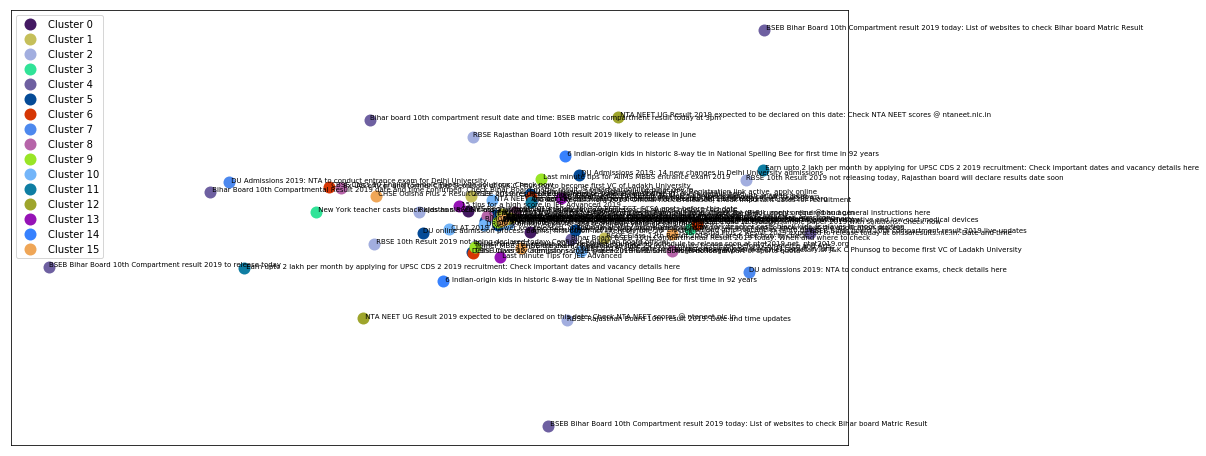

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [46]:
#centers = np.array(km.cluster_centers_)

In [47]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [48]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [49]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [50]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [51]:
#df.sort_values(by='Cluster')

In [52]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [53]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [54]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [55]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [56]:
#df_less

In [57]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [58]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [59]:
#Result

In [60]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [61]:
#df_more

In [62]:
#Result = Result.append(df_more)

In [63]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [64]:
##Result

In [65]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [66]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [67]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,India Today,BRO Recruitment 2019: Apply for 778 Electrici...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0
1,India Today,"NVS Recruitment 2019: Apply for 370 PGT, TGT,...",2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0
2,Time of India,UPSEE 2019 result to be declared on June 3 @up...,2019-05-31,11:27:00,https://timesofindia.indiatimes.com/home/educa...,1
3,India Today,RSOS Class 12th Result 2019 declared: See how...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,1
4,Indian Express,Rajasthan RSOS class 12 results: How to check ...,2019-05-31,12:34:50 pm,https://indianexpress.com/article/education/ra...,2


In [68]:
vectorizer = TfidfVectorizer()

In [69]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [70]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [71]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.58, 0.58]


[0.63, 0.63]


[0.2, 0.32, 0.28, 0.32, 0.32, 0.31, 0.35]


[1.0, 1.0]


[0.62, 0.47, 0.62, 0.48, 0.45, 0.49, 0.54]


[0.28, 0.17, 0.28, 0.21, 0.29, 0.2, 0.18, 0.2]


[0.59, 0.63, 0.6, 0.47]


[0.73, 0.73]


[0.14, 0.13, 0.14, 0.26, 0.13, 0.16, 0.13, 0.14, 0.26]


[0.35, 0.3, 0.27, 0.32]


[0.25, 0.24, 0.29, 0.27, 0.29]


[0.52, 0.76, 0.76]


[0.17, 0.3, 0.15, 0.3, 0.14, 0.19, 0.15, 0.14]


[0.49, 0.42, 0.51]


[1.0, 1.0]


[0.5, 0.51, 0.48, 0.26]




In [72]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [74]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.580000
1     0.630000
2     0.300000
3     1.000000
4     0.524286
5     0.226250
6     0.572500
7     0.730000
8     0.165556
9     0.310000
10    0.268000
11    0.680000
12    0.192500
13    0.473333
14    1.000000
15    0.437500
Name: cluster_similarity_value, dtype: float64

In [75]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,BRO Recruitment 2019: Apply for 778 Electrici...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0,0.58
1,India Today,"NVS Recruitment 2019: Apply for 370 PGT, TGT,...",2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0,0.58
2,Time of India,UPSEE 2019 result to be declared on June 3 @up...,2019-05-31,11:27:00,https://timesofindia.indiatimes.com/home/educa...,1,0.63
3,India Today,RSOS Class 12th Result 2019 declared: See how...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,1,0.63
4,Indian Express,Rajasthan RSOS class 12 results: How to check ...,2019-05-31,12:34:50 pm,https://indianexpress.com/article/education/ra...,2,0.20
5,India Today,RBSE 10th Result 2019 not being declared toda...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,2,0.32
6,Indian Express,Dungar College Rajasthan declares PTET results...,2019-05-31,10:13:35 am,https://indianexpress.com/article/education/ra...,2,0.28
7,Indian Express,"Rajasthan PTET results 2019 declared, counsell...",2019-05-31,11:19:24 am,https://indianexpress.com/article/education/ra...,2,0.32
8,Indian Express,RBSE Rajasthan Board 10th result 2019 likely t...,2019-05-31,10:22:45 am,https://indianexpress.com/article/education/bs...,2,0.32
9,Indian Express,RBSE Rajasthan Board 10th result 2019: Date an...,2019-05-31,10:19:35 am,https://indianexpress.com/article/education/rb...,2,0.31


In [76]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [77]:
col=df_sorted.columns

In [78]:
temp_more =[]
temp_less  =[]

In [79]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
            temp_less.append(cluster.iloc[i])
        else:
            temp_more.append(cluster.iloc[i])

In [80]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [81]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [82]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,0,India Today,BRO Recruitment 2019: Apply for 778 Electrici...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0,0.58
1,2,Time of India,UPSEE 2019 result to be declared on June 3 @up...,2019-05-31,11:27:00,https://timesofindia.indiatimes.com/home/educa...,1,0.63
2,9,Indian Express,RBSE Rajasthan Board 10th result 2019: Date an...,2019-05-31,10:19:35 am,https://indianexpress.com/article/education/rb...,2,0.31
3,11,India Today,New York teacher casts black kids as slaves i...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,3,1.00
4,13,India Today,BSEB Bihar Board 10th Compartment result 2019...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,4,0.62


In [83]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [84]:
Result = Result.append(df_less_similar)

In [85]:
Result = Result.sort_values(by='Cluster')

In [86]:
Result=Result.reset_index().drop(['index'],axis=1)

In [87]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,BRO Recruitment 2019: Apply for 778 Electrici...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0,0.58
1,Time of India,UPSEE 2019 result to be declared on June 3 @up...,2019-05-31,11:27:00,https://timesofindia.indiatimes.com/home/educa...,1,0.63
2,Indian Express,RBSE Rajasthan Board 10th result 2019: Date an...,2019-05-31,10:19:35 am,https://indianexpress.com/article/education/rb...,2,0.31
3,Indian Express,Dungar College Rajasthan declares PTET results...,2019-05-31,10:13:35 am,https://indianexpress.com/article/education/ra...,2,0.28
4,Indian Express,Rajasthan RSOS class 12 results: How to check ...,2019-05-31,12:34:50 pm,https://indianexpress.com/article/education/ra...,2,0.20
5,India Today,New York teacher casts black kids as slaves i...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,3,1.00
6,India Today,BSEB Bihar Board 10th Compartment result 2019...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,4,0.62
7,India Today,Bihar Board 10th Compartmental Result 2019 da...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,4,0.47
8,Hindiustan Times,Bihar board 10th compartment result date and t...,2019-05-31,13:34:00,https://www.hindustantimes.com/education/bihar...,4,0.49
9,Indian Express,Bihar Board BSEB 10th Compartmental Result 201...,2019-05-31,9:35:52 am,https://indianexpress.com/article/education/bi...,4,0.48


In [88]:
outname ='Education-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Output CSV\ "
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [89]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [90]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,BRO Recruitment 2019: Apply for 778 Electrici...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,0,0.58
1,Time of India,UPSEE 2019 result to be declared on June 3 @up...,2019-05-31,11:27:00,https://timesofindia.indiatimes.com/home/educa...,1,0.63
2,Indian Express,RBSE Rajasthan Board 10th result 2019: Date an...,2019-05-31,10:19:35 am,https://indianexpress.com/article/education/rb...,2,0.31
3,Indian Express,Dungar College Rajasthan declares PTET results...,2019-05-31,10:13:35 am,https://indianexpress.com/article/education/ra...,2,0.28
4,Indian Express,Rajasthan RSOS class 12 results: How to check ...,2019-05-31,12:34:50 pm,https://indianexpress.com/article/education/ra...,2,0.20
5,India Today,New York teacher casts black kids as slaves i...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,3,1.00
6,India Today,BSEB Bihar Board 10th Compartment result 2019...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,4,0.62
7,India Today,Bihar Board 10th Compartmental Result 2019 da...,2019-05-31,13:41,https://timesofindia.indiatimes.com/education-...,4,0.47
8,Hindiustan Times,Bihar board 10th compartment result date and t...,2019-05-31,13:34:00,https://www.hindustantimes.com/education/bihar...,4,0.49
9,Indian Express,Bihar Board BSEB 10th Compartmental Result 201...,2019-05-31,9:35:52 am,https://indianexpress.com/article/education/bi...,4,0.48
